<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.3)
# This line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# This line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
with open('sat_scores.csv', mode='r') as f:
    reader = csv.reader(f)
    rows = [row for row in reader]
    header = rows.pop(0)
    data = {header[i]:[row[i] for row in rows] for i in range(4)}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

### Answer: 
The data type obtained is different from the two methods. The numeric value created from dictionary is remained as "object" while the one created with `.read_csv()` function is automatically converted to "int64".

In [3]:
# Create DataFrame with the SAT dictionary.
sat_dic = pd.DataFrame(data)
sat_dic.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [4]:
# Create DataFrame with pandas .read_csv() function.
sat = pd.read_csv('sat_scores.csv')
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [7]:
# Analyse focus on individual state.
# Drop the last row with "State" is "All".
sat = sat[:51]

In [8]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
# Create data dictionary.
d = {
    'Columns': list(sat.columns.values),
    'Type': list(sat.dtypes.values),
    'Description': {
        'State': 'Names of each state',
        'Rate': 'Participation rate by state',
        'Verbal': 'Average verbal score',
        'Math': 'Average math score'
    },
    'Shape': sat.shape
}

# Print data dictionary.
pprint(d)

{'Columns': ['State', 'Rate', 'Verbal', 'Math'],
 'Description': {'Math': 'Average math score',
                 'Rate': 'Participation rate by state',
                 'State': 'Names of each state',
                 'Verbal': 'Average verbal score'},
 'Shape': (51, 4),
 'Type': [dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

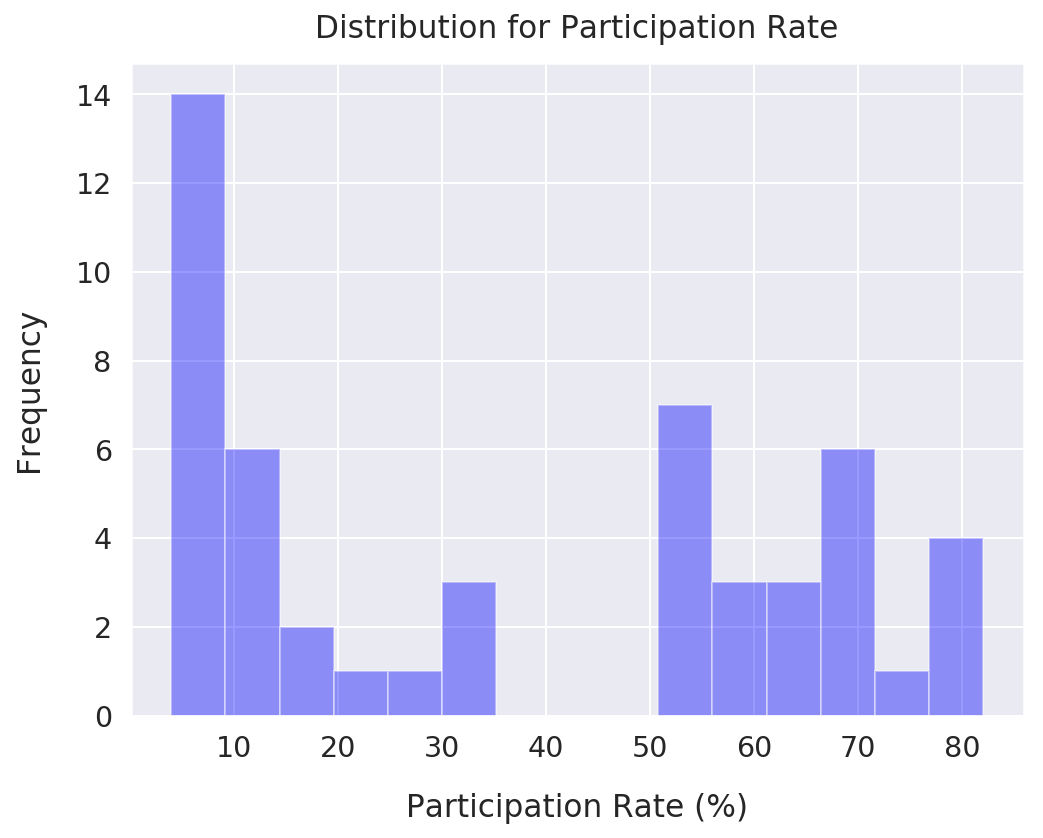

In [10]:
# Plot the distribution for "Rate".
plt.figure(figsize=(8,6))
sns.distplot(sat['Rate'], kde=False, bins=15, color='b')
plt.xlabel('Participation Rate (%)', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution for Participation Rate', y=1.02)
plt.show()

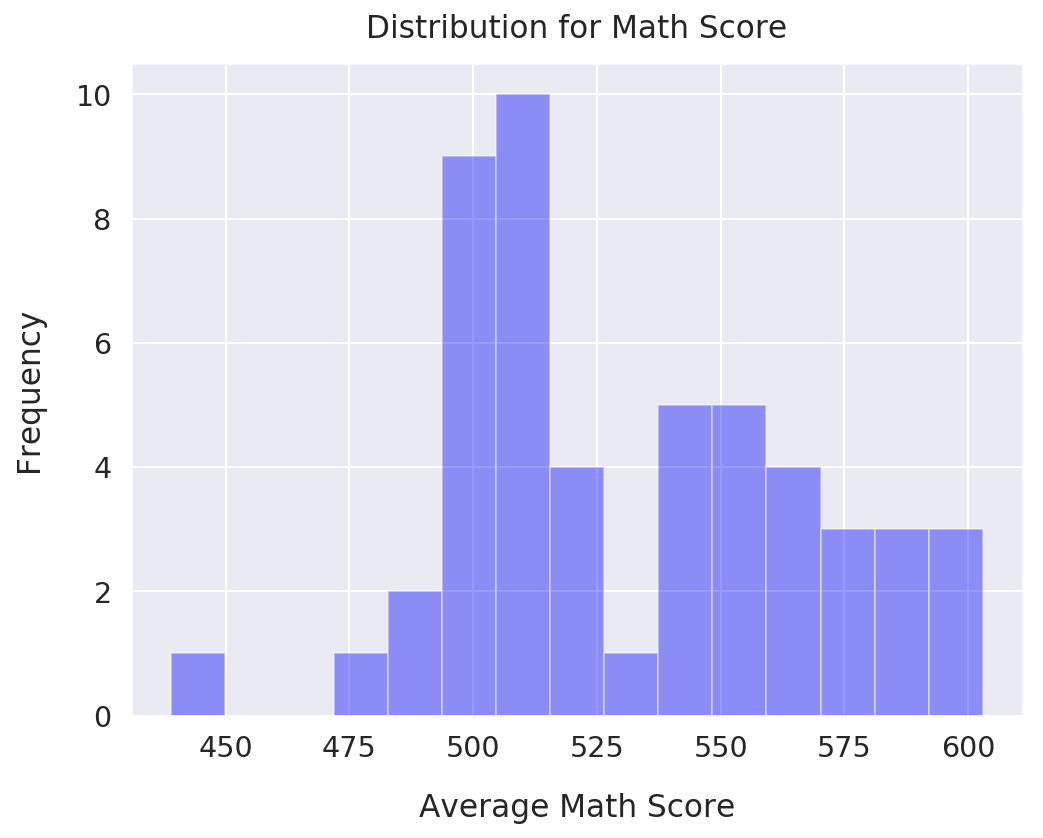

In [11]:
# Plot the distribution for "Math".
plt.figure(figsize=(8,6))
sns.distplot(sat['Math'], kde=False, bins=15, color='b')
plt.xlabel('Average Math Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution for Math Score', y=1.02)
plt.show()

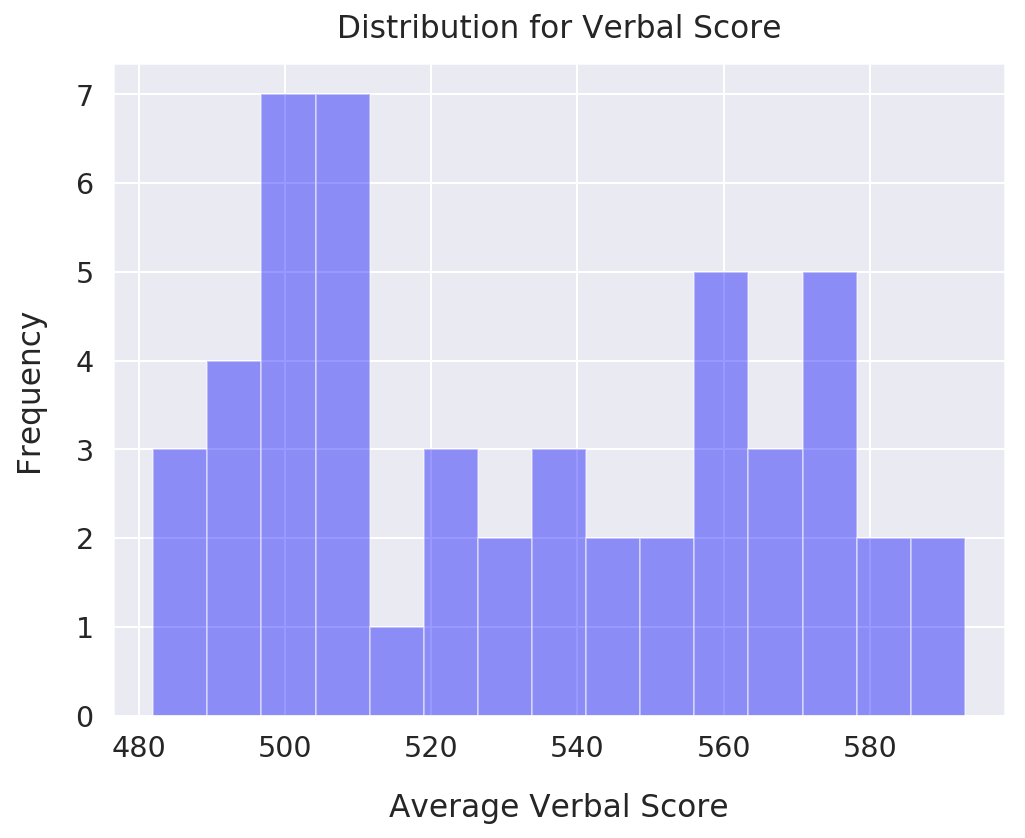

In [12]:
# Plot the distribution for "Verbal".
plt.figure(figsize=(8,6))
sns.distplot(sat['Verbal'], kde=False, bins=15, color='b')
plt.xlabel('Average Verbal Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution for Verbal Score', y=1.02)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

### Answer: 
- "Verbal" and "Rate" has approximate negative exponential relationship. "Verbal" decreases as "Rate" increases.
- "Math" and "Rate" has approximate negative exponential relationship. "Math" decreases as "Rate" increase. Outlier is observed from the graph.
- "Math" and "Verbal" has approximate positive linear relationship. "Math" increases as "Verbal" increases. Outlier is observed from the graph.

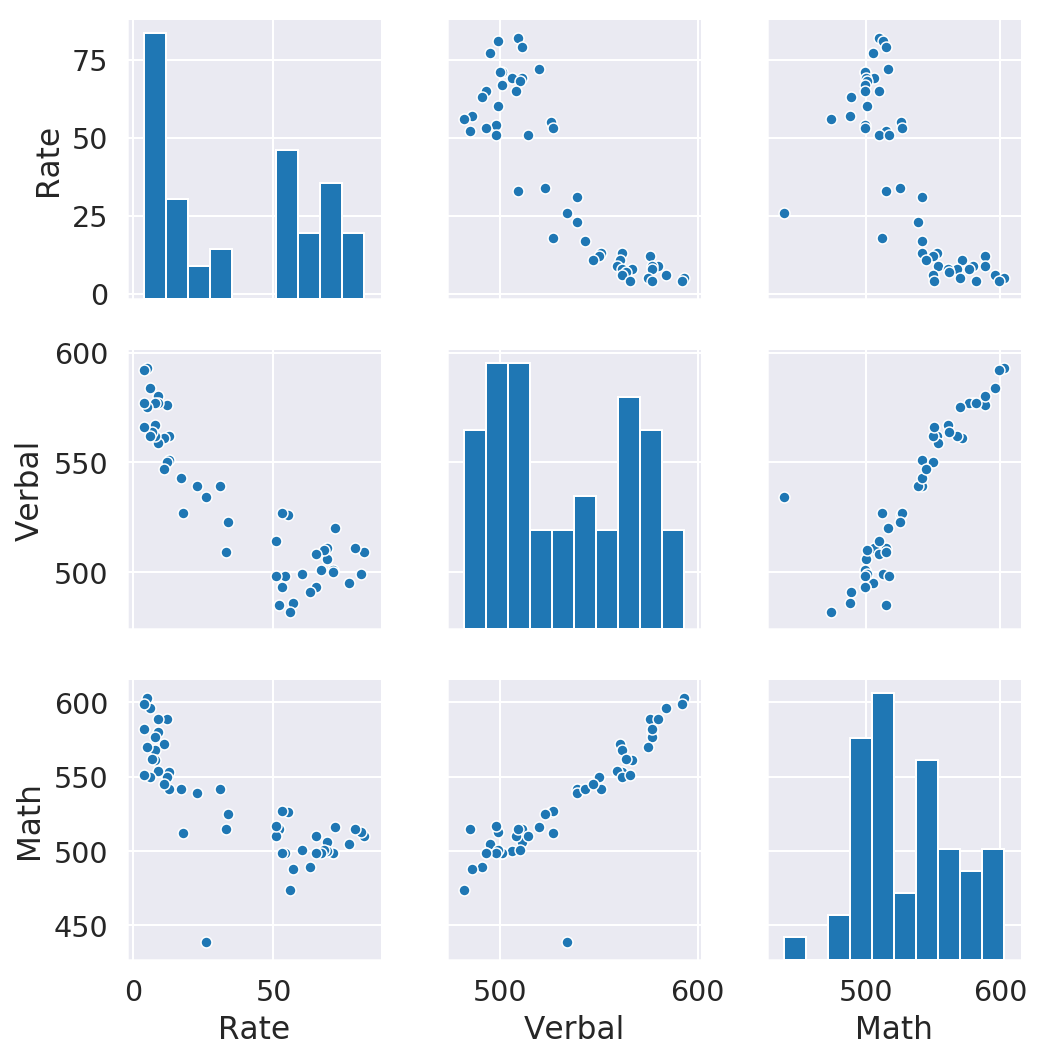

In [13]:
sns.pairplot(sat, plot_kws=dict(s=30))
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

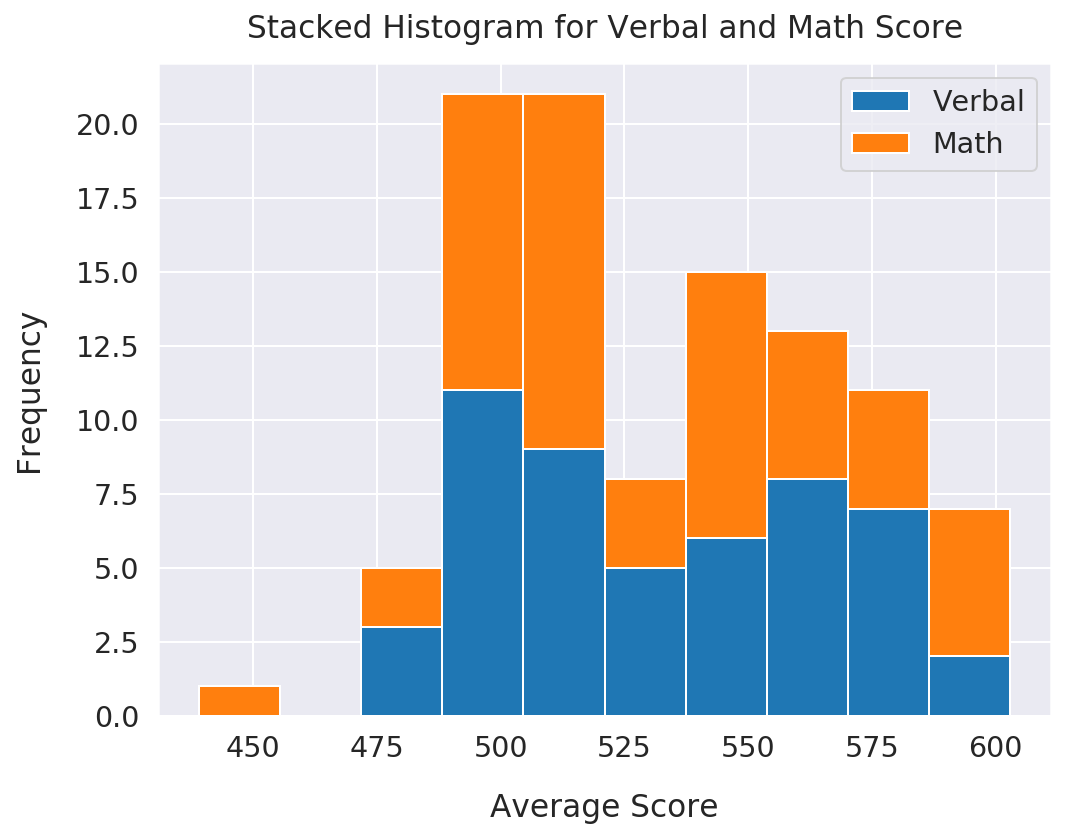

In [14]:
sat[['Verbal', 'Math']].plot.hist(stacked=True, figsize=(8,6))
plt.xlabel('Average Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Stacked Histogram for Verbal and Math Score', y=1.02)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

### Ans 1:
- Scatter plot shows relationship between two parameters and histogram shows the fequency for a group of data.
- Boxplot shows the five most important measures - minimum, first quartile, median, third quartile, and the maximum in one graph. We can get an overall picture of the center and deviation for each column as well as identify outliers.

### Ans 2:
- Sincep mean of "Rate" deviates far from the other two columns, drawing the three columns together will force the data to be scaled which would induce difficulty observing the trend.

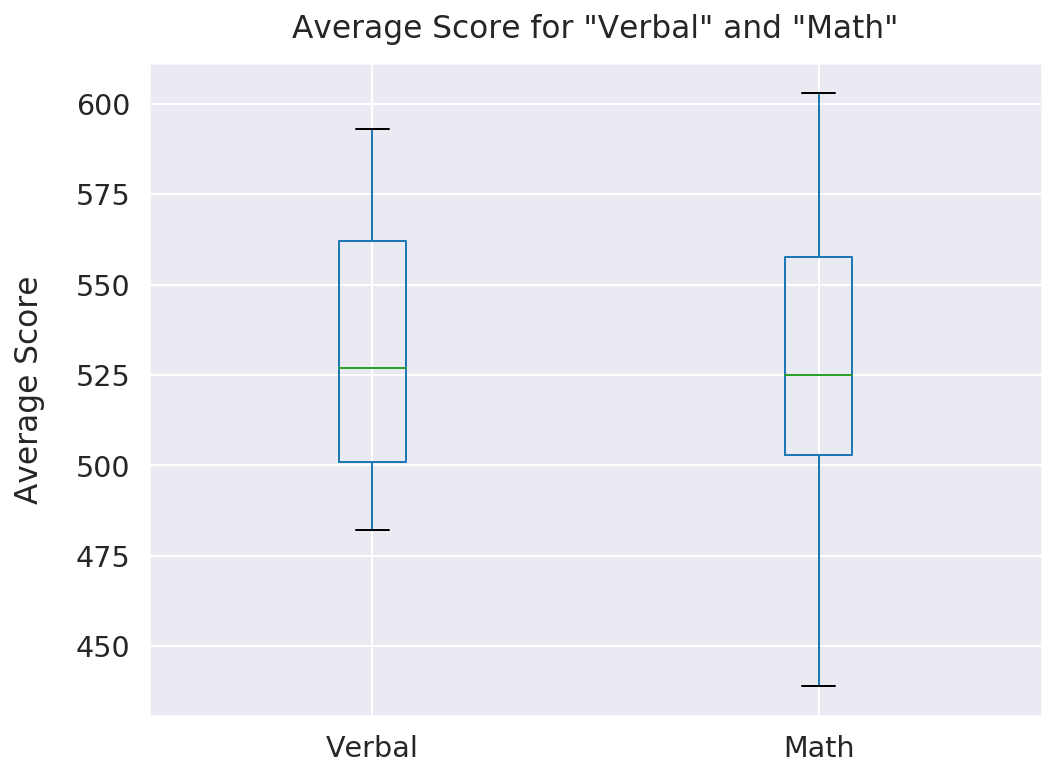

In [15]:
sat[['Verbal', 'Math']].plot.box(figsize=(8,6))
plt.title('Average Score for "Verbal" and "Math"', y=1.02)
plt.ylabel('Average Score', labelpad=15)
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### Ans:
Rescale the data to force the distribution of each variable to have a mean of 0 and a standard deviation of 1. 

Standardize the variables using formula: $\displaystyle x_{std} = \frac{x - \bar{x}}{s}$ 

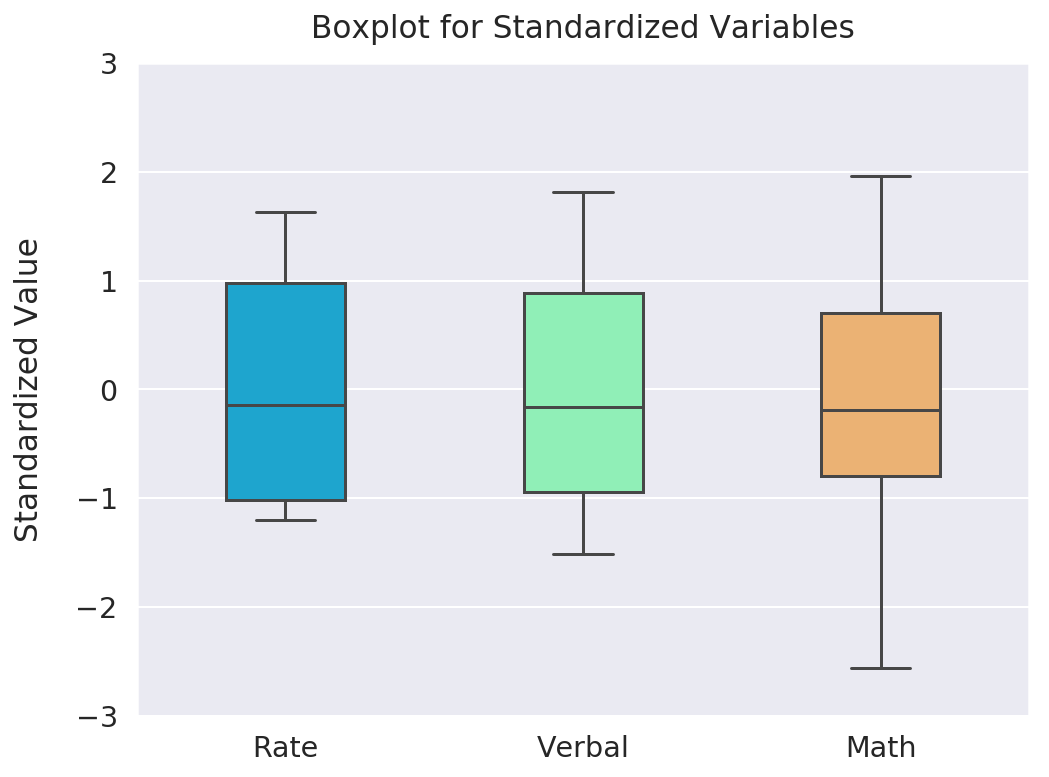

In [16]:
# Create DataFrame for Standardize variables.
sat_stand = (sat.iloc[:,1:] - sat.mean()) / sat.std()

# Plot the new DataFrame.
plt.figure(figsize=(8,6))
sns.boxplot(data=sat_stand, width=0.4, palette='rainbow')
plt.ylabel('Standardized Value', labelpad=15)
plt.title('Boxplot for Standardized Variables', y=1.02)
plt.yticks(np.arange(-3, 4, step=1))
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




### Ans: 
There is 24 states above the mean. This shows that the mean is located at center of the distribution.

In [17]:
# Show list of states.
sat[sat['Verbal'] > np.mean(sat['Verbal'])]['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [18]:
# Show no. of states.
len(sat[sat['Verbal'] > np.mean(sat['Verbal'])]['State'])

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

### Ans: 
This is exactly the same list as the mean of Verbal scores. This shows that the data has same mean and median and both located at center of the distribution.

In [19]:
# Show list of states.
sat[sat['Verbal'] > np.median(sat['Verbal'])]['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [20]:
# Show no. of states.
len(sat[sat['Verbal'] > np.median(sat['Verbal'])]['State'])

24

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
# Create new column.
sat['difference'] = sat['Verbal'] - sat['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
# Create new DataFrame.
high_verbal = sat.sort_values('difference', ascending=False)[:10]
high_math = sat.sort_values('difference', ascending=True)[:10]

In [23]:
# Verbal is greater than Math.
high_verbal.head(3)

,State,Rate,Verbal,Math,difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [24]:
# Math is greater than Verbal.
high_math.head(3)

,State,Rate,Verbal,Math,difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


### Ans:
We can conclude there is a linear relationship between two variables based on rule of thumb: $\displaystyle |r|\geq \frac{2}{\sqrt{n}}$, in this case, $\displaystyle |r| \geq 0.28$.
- High negative linear relationship exists between "Math" and "Rate", which indicates that average math score drops as participation rate gets higher.
- Higher negative linear relationship exists between "Verbal" and "Rate", which indicates that average verbal score drops even more than math as participation rate gets higher.
- Very high positive linear relationship exists between "Math" and "Verbal", which indicates that state has a high math score also has high verbal score.

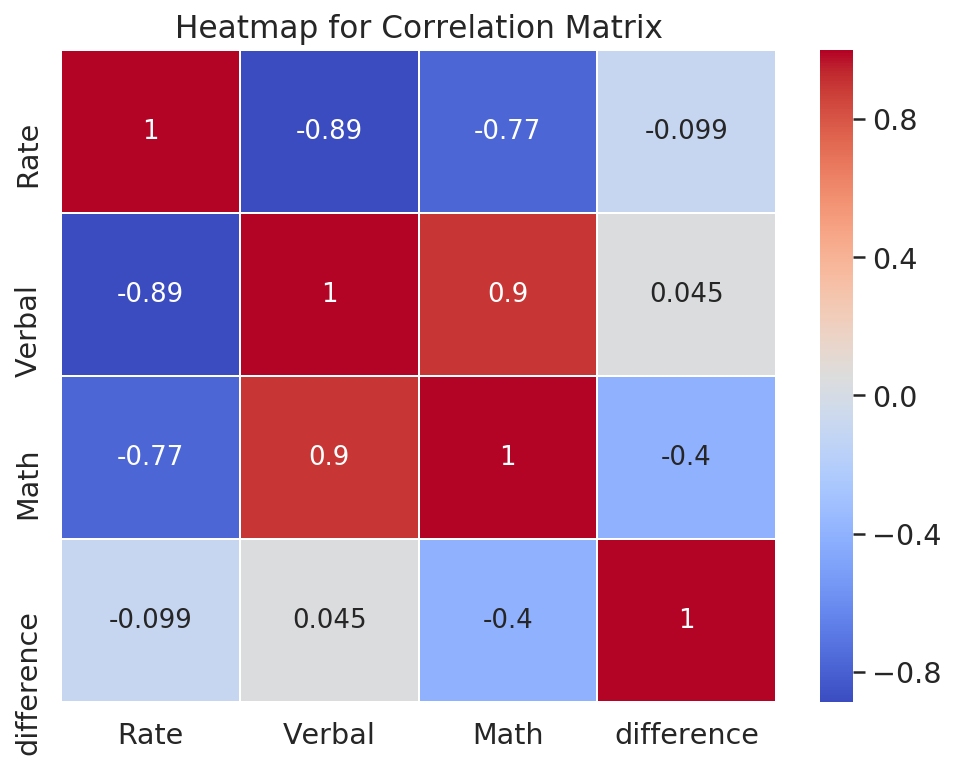

In [25]:
# Draw heatmap for correlation matrix.
plt.figure(figsize=(8,6))
sns.heatmap(sat.corr(), linewidths=.5, cmap='coolwarm', annot=True, annot_kws={"size": 13})
plt.title('Heatmap for Correlation Matrix', y=1.02)
plt.show()

In [26]:
# Calculate rule of thumb.
2 / (len(sat)**0.5)

0.28005601680560194

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

### Answer:
- count: number of non-NA/null entries for the column
- mean: average value of the column
- std: standard deviation of the column
- min: minimum value of the column
- 25%: 25th percentile or 1st quartile of the column
- 50%: 50th percentile or 2nd quartile or median of the column
- 75%: 75th percentile or 3rd quartile of the column
- max: maximum value of the column

In [27]:
sat.describe()

,Rate,Verbal,Math,difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

### 6.3.1 Answer:
- Correlation is a measure of direction and strength of linear relationship between two variables. Covariance only measures direction of the relationship. This means that higher numerical value of covariance does not indicate a stronger linear relationship. Instead, the sign is matters. A positive value indicates a positive linear relationship while a negative value indicates a negative relationship.
- Covariance result has no upper or lower limit while correlation is always between -1 and 1.
- Covariance is not standardized and is dependent on the scale of the variables while correlation is standardized and is independent of the scale of variables.

### 6.3.2 Answer:
Correlation can be calculated using covariance divided by product of standard deviations of the two variables.

$$corr = \frac{Cov(x,y)}{s_x s_y}$$
### 6.3.3 Answer:
- Variables are standardized and is independent of scale of variables.
- From correlation matrix we can see the strength of relationship but covariance cannot.

In [28]:
# Show covariance matrix.
sat.cov()

,Rate,Verbal,Math,difference
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
difference,-43.06,23.529412,-227.370196,250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

### Answer:
This dataset requires cleaning since it contains invalid elements "-" in some "frequency" columns. In this case, rows contain "-" is dropped to facilitate data analysis and all columns are converted to float.

In [29]:
# Load dataset.
drug = pd.read_csv('drug-use-by-age.csv')

# Print dataset information.
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [30]:
# Check all columns with dtypes == 'object'.
drug.select_dtypes(include=['object'])

,age,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,5.0,-,35.5,19.0,24.5,-
1,13,1.0,3.0,-,12.0,41.0,5.0
2,14,5.5,-,2.0,5.0,4.5,24.0
3,15,4.0,9.5,1.0,5.5,3.0,10.5
4,16,7.0,1.0,66.5,3.0,4.0,36.0
5,17,5.0,21.0,64.0,4.0,6.0,48.0
6,18,5.0,10.0,46.0,4.0,7.0,12.0
7,19,5.5,2.0,180.0,3.0,7.5,105.0
8,20,8.0,5.0,45.0,4.0,12.0,12.0
9,21,5.0,17.0,30.0,2.0,13.5,2.0


In [31]:
# Drop the rows with str '-'
drug.drop(drug[drug.values == '-'].index, inplace=True)

# Convert Series to float.
drug.iloc[:, 2:] = drug.iloc[:, 2:].apply(pd.to_numeric)

# Check the data type.
drug.get_dtype_counts()

float64    26
int64       1
object      1
dtype: int64

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [32]:
drug_melt = drug.melt(id_vars=['age', 'n'])

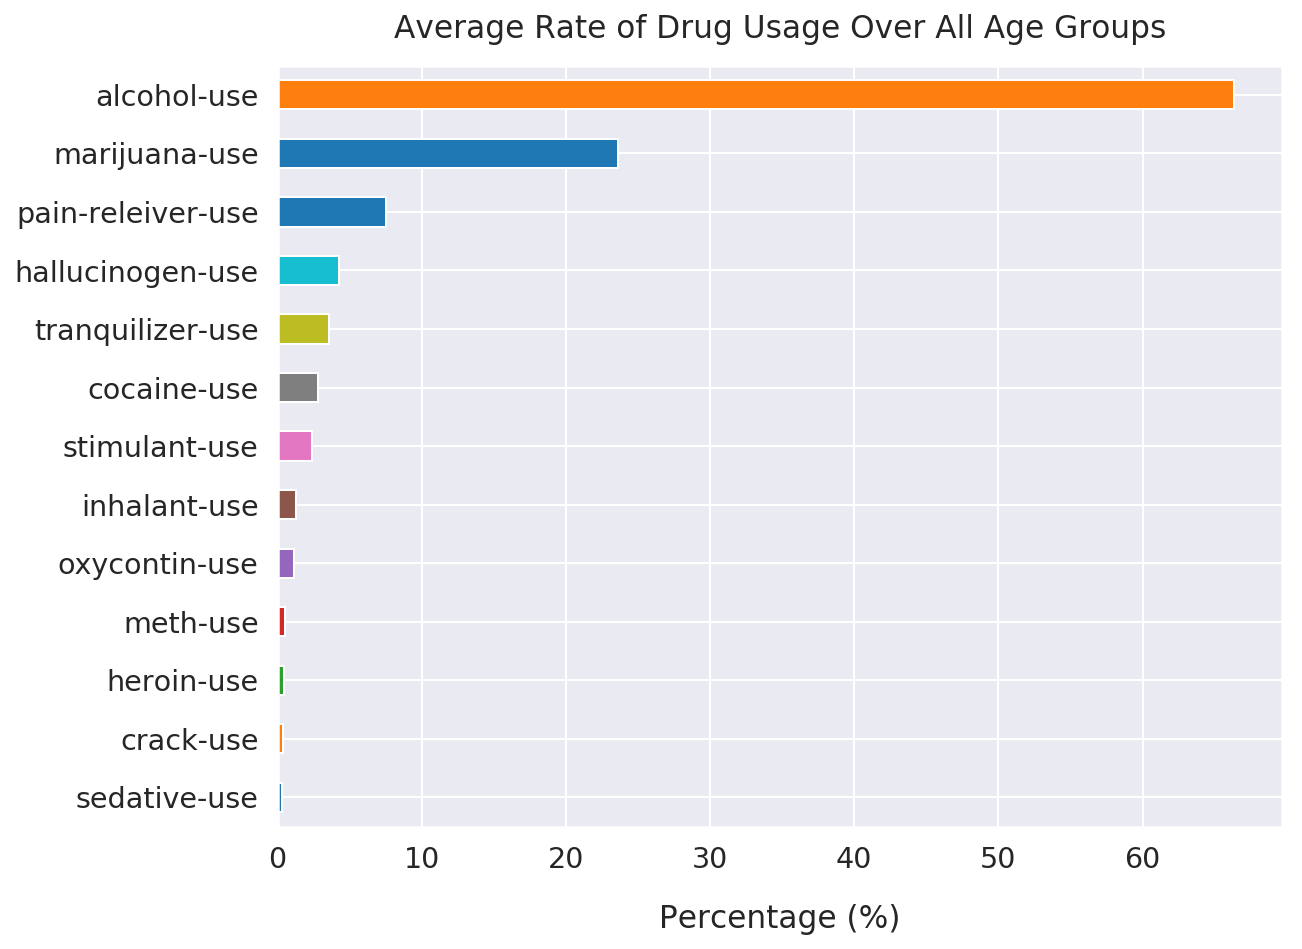

In [33]:
drug.mean()[1::2].sort_values().plot(kind='barh', figsize=(9,7))
plt.xlabel('Percentage (%)', labelpad=15)
plt.title('Average Rate of Drug Usage Over All Age Groups', y=1.02)
plt.show()

In [34]:
# sns.clustermap(drug.corr(), cmap='coolwarm', standard_scale=1)

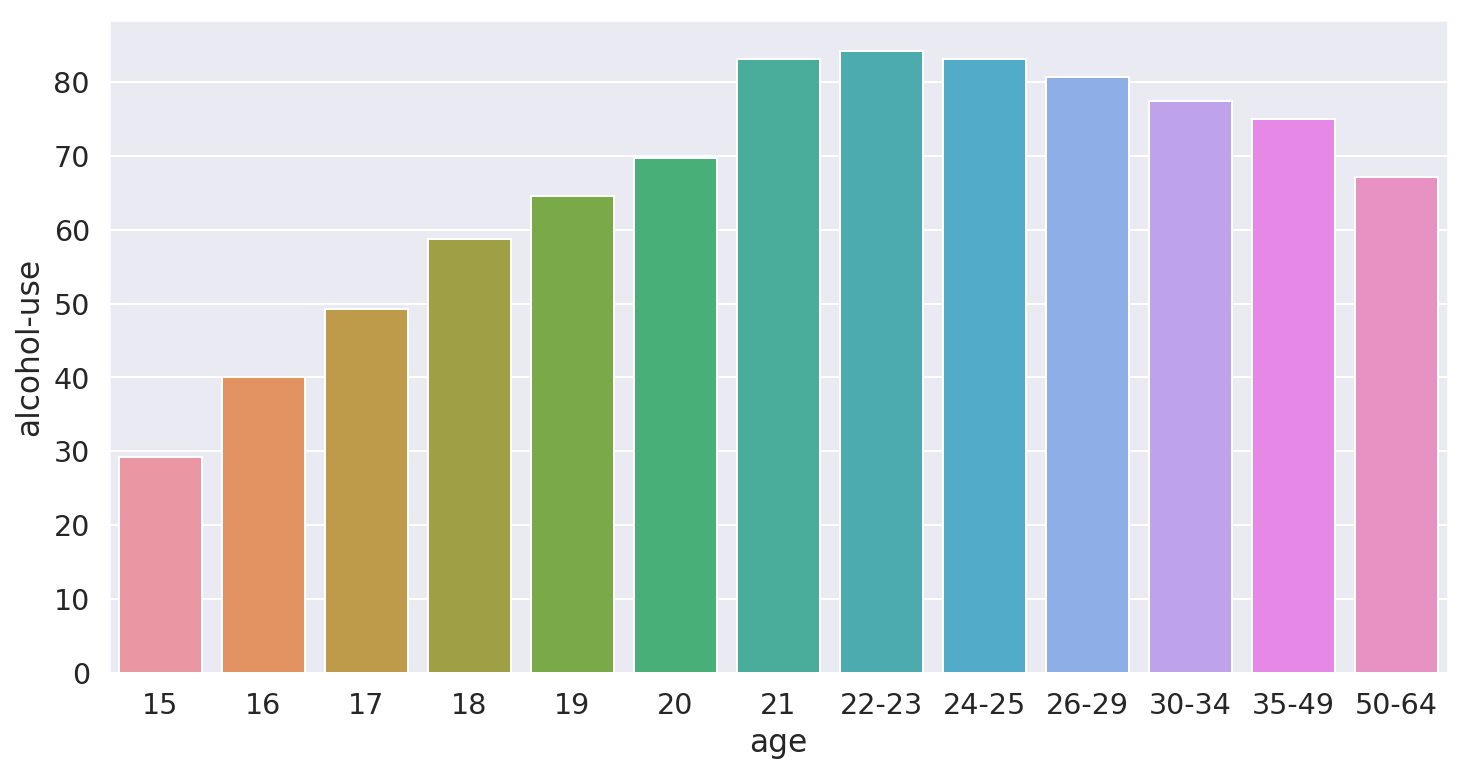

In [35]:
plt.subplots(figsize=(12, 6))
sns.barplot(x='age', y='alcohol-use', data=drug)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [36]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

### Answer: 
- Since the dataset sample size is small, any data falls outside $\pm2\sigma$ is considered as outliers. Numerical representation of outlier is: $z_i > 2$ or $z_i < -2$ where $\displaystyle z_i = \frac{x_i - \mu}{\sigma}$.
- Since two outliers is detected in "Math", comparison is performed on average math score only. The calculated result shows the mean and median almost the same as original after cleaned but the standard deviation is reduced since outlier is removed hence data is less spread.

In [37]:
# Read the dataset.
sat = pd.read_csv('sat_scores.csv')

# Take out the rate variable.
sat = sat.iloc[:, 2:]

In [38]:
# Calculate the Z-score.
sat_z = pd.DataFrame(np.abs(stats.zscore(sat)), columns=['z_verbal', 'z_math'])
sat_z.head()

,z_verbal,z_math
0,0.699352,0.602798
1,1.003164,0.518687
2,0.638589,0.462613
3,1.124689,0.742984
4,0.365159,0.434575


In [39]:
# Identify outliers
sat_z[(sat_z > 2) | (sat_z < -2)].dropna(thresh=1)

,z_verbal,z_math
27,NaN,2.593434
47,NaN,2.004654


In [40]:
# Drop outliers for "Math".
sat_math = sat['Math'].drop(index=[27,47])
print('-'*15)
print('Original')
print('-'*15)
print('Mean: {}'.format(sat['Math'].mean()))
print('Median: {}'.format(sat['Math'].median()))
print('Std: {:.2f}'.format(sat['Math'].std()))
print('-'*15)
print('Cleaned')
print('-'*15)
print('Mean: {}'.format(sat_math.mean()))
print('Median: {}'.format(sat_math.median()))
print('Std: {:.2f}'.format(sat_math.std()))

---------------
Original
---------------
Mean: 531.5
Median: 521.0
Std: 36.01
---------------
Cleaned
---------------
Mean: 531.92
Median: 521.0
Std: 32.72


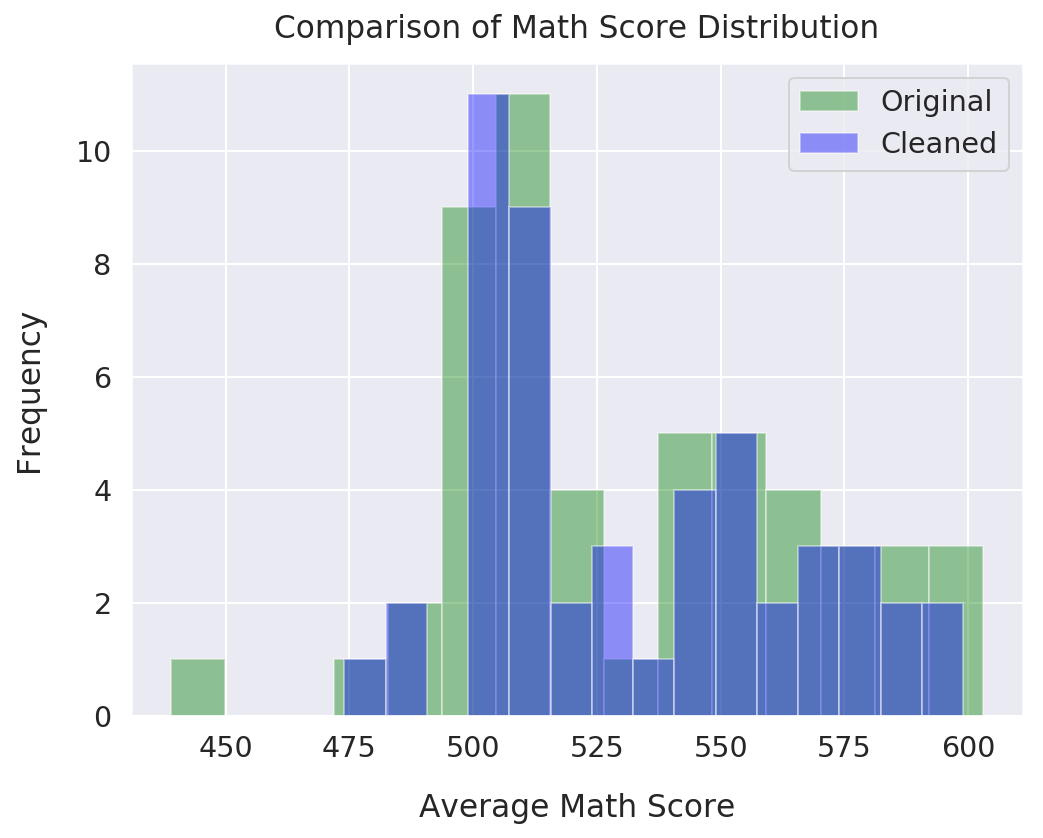

In [41]:
# Compare distribution before and after cleaning.
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(sat['Math'], bins=15, ax=ax, kde=False, label='Original', color='g')
sns.distplot(sat_math, bins=15, ax=ax, kde=False, label='Cleaned', color='b')
ax.legend()
plt.xlabel('Average Math Score', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Comparison of Math Score Distribution', y=1.02)
plt.show()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [42]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

### 9.1.1 Answer:

The Pearson correlation evaluates the linear relationship between two continuous variables, which means that the variables move in the same direction at a constant rate. Spearman rank correlation measures a monotonic relationship between two ordinal variables, the variables tend to move in the same relative direction, but not necessarily at a constant rate. Spearman and pearson correlation both measures the strength and direction of correlation between two variables.

### 9.1.2 Answer:
Suppose we have two variables A and B and each variable has $n=10$ elements. Below is the procedure to calculate the Spearman correlation.

**Case 1: Distinct Ranks**

Step 1: Rank each variable by either ascending or descending order as Rank A and Rank B.

Step 2: Calculate the difference between the rank score as $d_i$.

Step 3: Calculate the sqaure of difference as $d_i^2$.

Step 4: Calculate $\displaystyle \sum d_i^2 = 194$

Step 5: Calculate Spearman correlation: $\displaystyle \rho =1-{\frac {6\sum d_{i}^{2}}{n(n^{2}-1)}} = 1- \frac {6 \times 194}{10(10^2-1)} \approx −0.176$ 

| Variable A | Variable B | Rank A | Rank B |$d_i$|$d_i^2$|
|:----------:|:----------:|:------:|:------:|:---:|:-----:|
|     95     |     89     |    1   |    1   |  0  |   0   |
|     97     |     102    |    2   |    6   | -4  |   16  |
|     99     |     108    |    3   |    8   | -5  |   25  |
|     100    |     103    |    4   |    7   | -3  |   9   |
|     102    |     115    |    5   |   10   | -5  |   25  |
|     103    |     112    |    6   |    9   | -3  |   9   |
|     107    |     92     |    7   |    3   |  4  |   16  |
|     116    |     98     |    8   |    5   |  3  |   9   |
|     118    |     90     |    9   |    2   |  7  |   49  |
|     120    |     95     |   10   |    4   |  6  |   36  |

---

**Case 2: Equal Ranks or Tied Ranks**

Step 1: Rank each variable by either ascending or descending order as Rank A and Rank B. Take the average for the tied ranks. e.g. rank 4, 5, 6 shares the same values, then the rank shall be calculated as: $\displaystyle \frac{4+5+6}{3} = 5$.

Step 2: Calculate the difference between the rank score as $d_i$.

Step 3: Calculate the sqaure of difference as $d_i^2$.

Step 4: Calculate $\displaystyle \sum d_i^2 = 194$

Step 5: Calculate Spearman correlation using modified formula, where $m$ is number of items whose ranks are common:

$\displaystyle \rho =1- \frac{6 \left\{ \sum d_{i}^{2} + \frac{1}{12}(m_1^3 - m_1) + \frac{1}{12}(m_2^3 - m_2) + \cdots \right\}}{n(n^{2}-1)} = 1- \frac {6 \times \left\{194 + \frac{1}{12}(3^3-3) + \frac{1}{12}(3^3-3) \right\}}{10(10^2-1)} \approx −0.182$

| Variable A | Variable B |     Rank A   |    Rank B    |$d_i$|$d_i^2$|
|:----------:|:----------:|:------------:|:------------:|:---:|:-----:|
|     95     |     89     |        1     |        1     |  0  |   0   |
|     97     |     102    |        2     |        6     | -4  |   16  |
|     99     |     105    |        3     |$\color{red}8$| -5  |   25  |
|     100    |     105    |$\color{red}5$|$\color{red}8$| -3  |   9   |
|     100    |     115    |$\color{red}5$|       10     | -5  |   25  |
|     100    |     105    |$\color{red}5$|$\color{red}8$| -3  |   9   |
|     107    |     92     |        7     |        3     |  4  |   16  |
|     116    |     98     |        8     |        5     |  3  |   9   |
|     118    |     90     |        9     |        2     |  7  |   49  |
|     120    |     95     |       10     |        4     |  6  |   36  |

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### Answer:
Percentile can be used to rank the variables for spearman correlation test.

In [43]:
# Reload dataset.
sat = pd.read_csv('sat_scores.csv')
sat = sat[:51]

# Create a new column of percentile score for "Rate".
sat['Rate_percentile'] = sat['Rate'].apply(lambda x: stats.percentileofscore(sat['Rate'], x, kind='rank'))

# Show the percentile of California.
sat.loc[sat['State'] == 'CA']

,State,Rate,Verbal,Math,Rate_percentile
23,CA,51,498,517,55.882353


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

### Answer:
We can have an overall picture of how outliers distributed through percentile distribusion. Those below 25 percentile and greater than 75 percentile are potential outliers and need further evaluation.

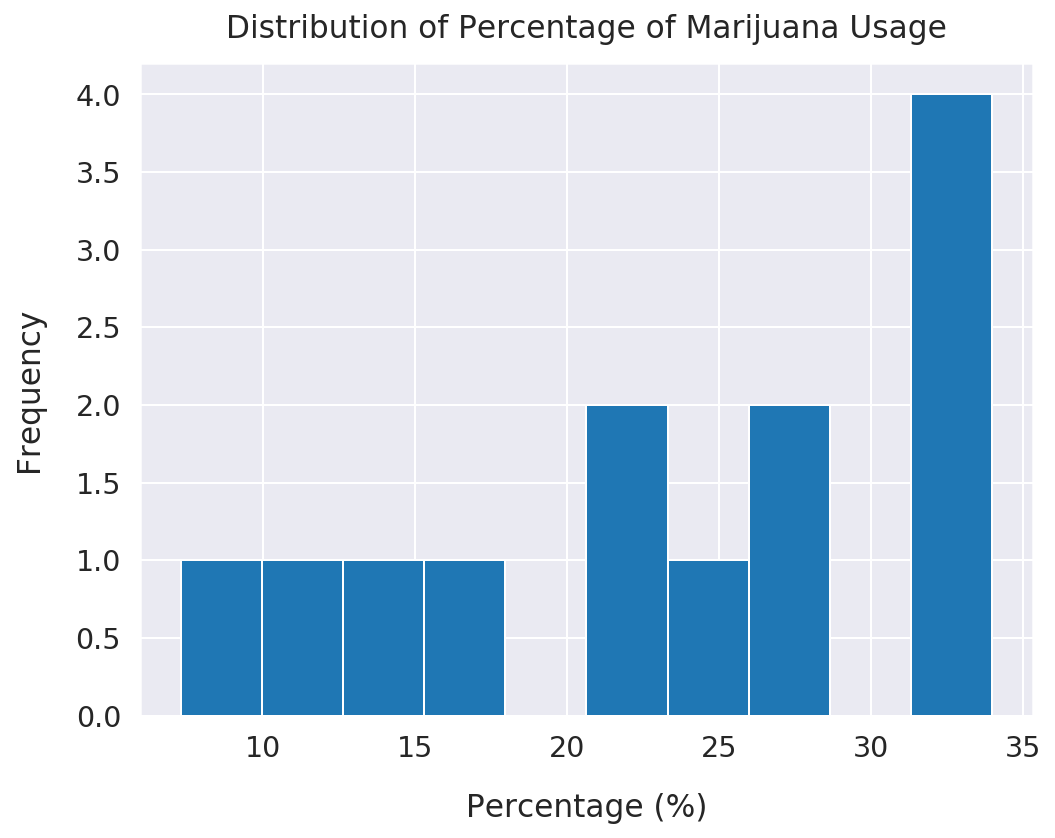

In [44]:
# Plot distribution for marijuana usage.
drug['marijuana-use'].plot(kind='hist', figsize=(8,6))
plt.xlabel('Percentage (%)', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution of Percentage of Marijuana Usage', y=1.02)
plt.show()

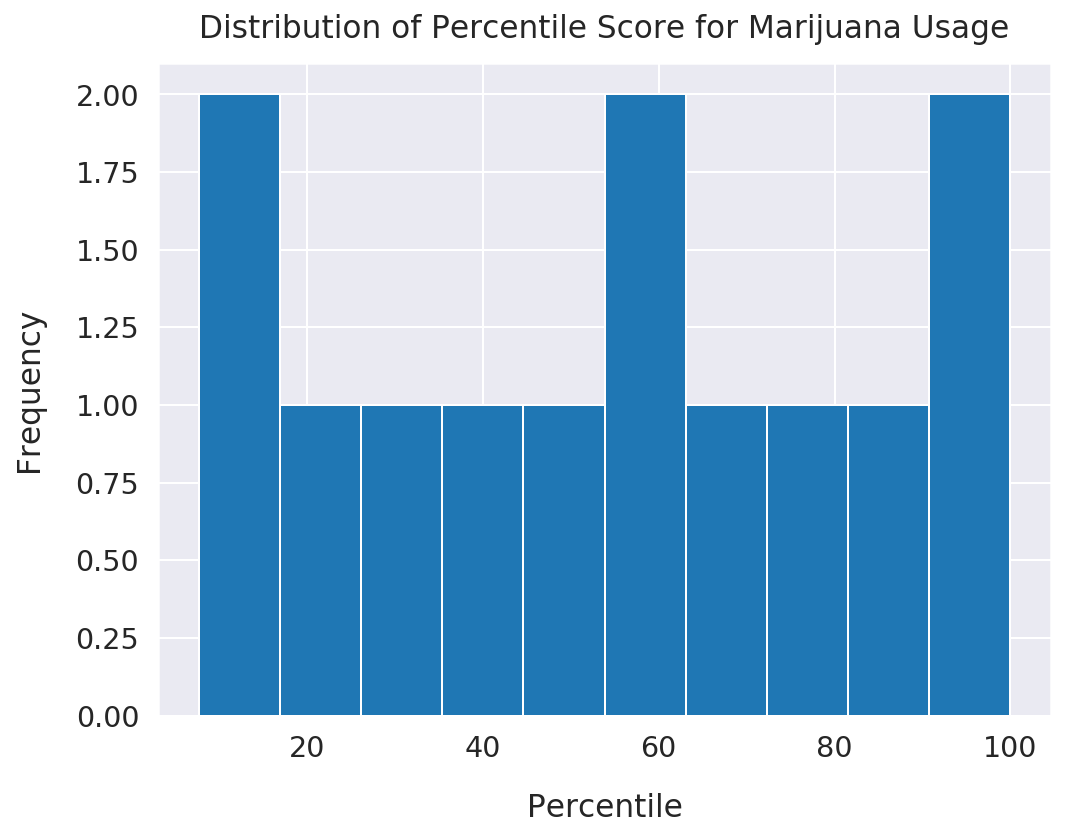

In [45]:
# Create new column for percentile score.
drug['marijuana-use-p'] = drug['marijuana-use'].\
    apply(lambda x: stats.percentileofscore(drug['marijuana-use'], x, kind='rank'))
# Plot the same variable with percentile score.
drug['marijuana-use-p'].plot(kind='hist', figsize=(8,6))
plt.xlabel('Percentile', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Distribution of Percentile Score for Marijuana Usage', y=1.02)
plt.show()